In [52]:
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.plugins.hparams.plugin_data_pb2 import HParamsPluginData
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def _load_run(path):
  event_acc = event_accumulator.EventAccumulator(path)
  event_acc.Reload()
  data = {}

  for tag in sorted(event_acc.Tags()["scalars"]):
    x, y = [], []

    for scalar_event in event_acc.Scalars(tag):
      x.append(scalar_event.step)
      y.append(scalar_event.value)

    data[tag] = (np.asarray(x), np.asarray(y))
  return data

In [19]:
def _load_hparams(path):
    event_acc = event_accumulator.EventAccumulator(path)
    event_acc.Reload()
    data = event_acc._plugin_to_tag_to_content["hparams"]["_hparams_/session_start_info"]
    hparam_data = HParamsPluginData.FromString(data).session_start_info.hparams
    return {key: hparam_data[key].ListFields()[0][1] for key in hparam_data.keys()}

In [30]:
_load_hparams("../L9/005/tb_logs/chess/version_42")["config/last_ckpt"]

'004/tb_logs/chess/version_23/last.ckpt'

In [68]:
def value_loss(path, meta, at=-1):
    dd = _load_run(path)
    return {**meta, "mse": dd["val_real_loss2/dataloader_idx_1"][1][at], "ce": dd["val_real_loss1/dataloader_idx_1"][1][at]}

In [70]:
value_loss("../L9/004/tb_logs/chess/version_23/", {"num_layers": 9, "iteration": 0}, at=0)

{'num_layers': 9,
 'iteration': 0,
 'mse': 0.9983747005462646,
 'ce': 8.246729850769043}

In [60]:
value_loss("../L12/010/tb_logs/chess/version_26/", {"num_layers": 12, "iteration": 10})

{'num_layers': 12,
 'iteration': 10,
 'mse': 0.7695834040641785,
 'ce': 3.1014015674591064}

In [71]:
table = [
    {"path": "../L9/004/tb_logs/chess/version_23/", "num_layers": 9, "iteration": 0, "at": 0},
    {"path": "../L9/004/tb_logs/chess/version_23/", "num_layers": 9, "iteration": 1, "at": -1},        
    {"path": "../L9/005/tb_logs/chess/version_42/", "num_layers": 9, "iteration": 2, "at": -1},    
    {"path": "../L9/006/tb_logs/chess/version_10/", "num_layers": 9, "iteration": 3, "at": -1},
    {"path": "../L9/007/tb_logs/chess/version_26/", "num_layers": 9, "iteration": 4, "at": -1},
    {"path": "../L9/008/tb_logs/chess/version_6/", "num_layers": 9, "iteration": 5, "at": -1},
    {"path": "../L9/009/tb_logs/chess/version_46/", "num_layers": 12, "iteration": 6, "at": -1},
    {"path": "../L12/010/tb_logs/chess/version_26/", "num_layers": 12, "iteration": 7, "at": -1},
]

In [75]:
df = pd.DataFrame([
    value_loss(meta["path"], meta, at=meta["at"])
    for meta in table
])

<Axes: xlabel='iteration', ylabel='mse'>

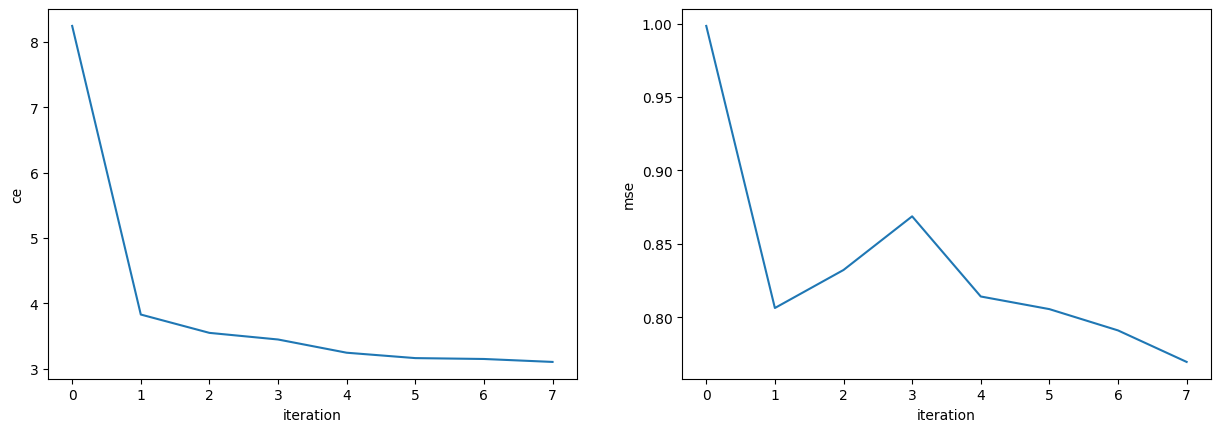

In [76]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
sns.lineplot(data=df, x="iteration", y="ce",  ax=ax[0])
sns.lineplot(data=df, x="iteration", y="mse", ax=ax[1])